In [13]:
from __future__ import division

import numpy as np
import os
from glob import glob

from PIL import Image
from copy import deepcopy

from sklearn import linear_model, datasets, neighbors
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm

%matplotlib inline
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import pandas as pd

import scipy.stats as stats
from scipy.stats import norm
import sklearn

In [15]:
X = pd.read_csv('./target_vs_competitor_similarity_trend_across_runs_by_roi.csv')
Y = pd.read_csv('./anchored_neural_changes_by_surfroi_and_subject.csv')

In [34]:
rois = np.unique(X.roi.values)
print 'Our ROIs:'
print rois

Our ROIs:
['EC' 'Fus' 'HC' 'IT' 'LOC' 'PHC' 'PRC' 'V1' 'V2']


In [35]:
X.groupby('roi')['slope'].mean()

roi
EC     0.002859
Fus    0.002278
HC     0.004494
IT     0.002625
LOC    0.000636
PHC    0.006652
PRC    0.002774
V1     0.000987
V2     0.001432
Name: slope, dtype: float64

0.00665248641304


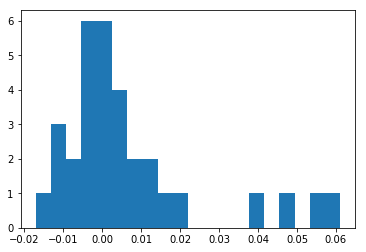

In [36]:
which_roi = 'PHC'
_X  = X[X['roi']==which_roi]
h = plt.hist(_X.slope,bins=20)
print np.mean(_X.slope)

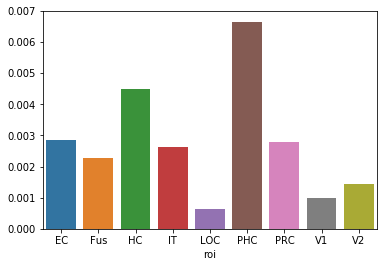

In [37]:
D = X.groupby('roi')['slope'].mean()
Y = pd.DataFrame(D)
sns.barplot(data=Y.transpose())

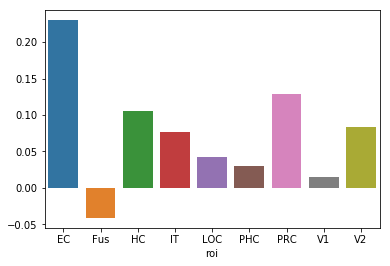

In [38]:
D = X.groupby('roi')['pearson'].mean()
Y = pd.DataFrame(D)
sns.barplot(data=Y.transpose())

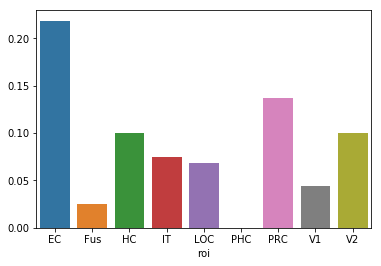

In [39]:
D = X.groupby('roi')['spearman'].mean()
Y = pd.DataFrame(D)
sns.barplot(data=Y.transpose())

In [50]:
def bootstrap_lt0(w,nIter=50000):
    boot = []
    for i in np.arange(nIter):
        boot.append(np.mean(np.random.choice(w,len(w),replace=True)))
    boot = np.array(boot) 
    p = sum(boot<0)/len(boot)*2
    lb = np.percentile(boot,2.5)
    ub = np.percentile(boot,97.5)
    print 'p = ' + str(sum(boot<0)/len(boot)*2)
    return boot, p, lb, ub

In [ ]:
pearson_p = []
pearson_ci = []
for roi in rois:
    print roi
    _X = X[X['roi']==roi]
    boot,p, lb, ub = bootstrap_lt0(_X.pearson.values)
    pearson_p.append(p)
    pearson_ci.append([lb, ub])
    
spearman_p = []
for roi in rois:
    print roi
    _X = X[X['roi']==roi]
    boot,p, lb, ub = bootstrap_lt0(_X.spearman.values)
    spearman_p.append(p)  
    spearman_ci.append([lb, ub])    
    
slope_p = []
for roi in rois:
    print roi
    _X = X[X['roi']==roi]
    boot,p, lb, ub = bootstrap_lt0(_X.slope.values)
    slope_p.append(p)  
    slope_ci.append([lb, ub])    

In [52]:
X = pd.DataFrame([rois,pearson_summary,spearman_summary,slope_summary])
X = X.transpose()
X.columns = ['roi','pearson','spearman','slope']
X

In [21]:
V1_diff = Y.trained_V1.values - Y.control_V1.values
V2_diff = Y.trained_V2.values - Y.control_V2.values
LOC_diff = Y.trained_LOC.values - Y.control_LOC.values
IT_diff = Y.trained_IT.values - Y.control_IT.values
fusiform_diff = Y.trained_fusiform.values - Y.control_fusiform.values
parahippo_diff = Y.trained_parahippo.values - Y.control_parahippo.values
PRC_diff = Y.trained_PRC.values - Y.control_PRC.values
ento_diff = Y.trained_ento.values - Y.control_ento.values
hipp_diff = Y.trained_hipp.values - Y.control_hipp.values


In [22]:
Y = Y.assign(V1_diff=pd.Series(V1_diff).values)
Y = Y.assign(V2_diff=pd.Series(V2_diff).values)
Y = Y.assign(LOC_diff=pd.Series(LOC_diff).values)
Y = Y.assign(IT_diff=pd.Series(IT_diff).values)
Y = Y.assign(fusiform_diff=pd.Series(fusiform_diff).values)
Y = Y.assign(parahippo_diff=pd.Series(parahippo_diff).values)
Y = Y.assign(PRC_diff=pd.Series(PRC_diff).values)
Y = Y.assign(ento_diff=pd.Series(ento_diff).values)
Y = Y.assign(hipp_diff=pd.Series(hipp_diff).values)


In [32]:
len(rois)

9

In [37]:
rois = np.unique(X.roi.values)
rois

array(['EC', 'Fus', 'HC', 'IT', 'LOC', 'PHC', 'PRC', 'V1', 'V2'], dtype=object)

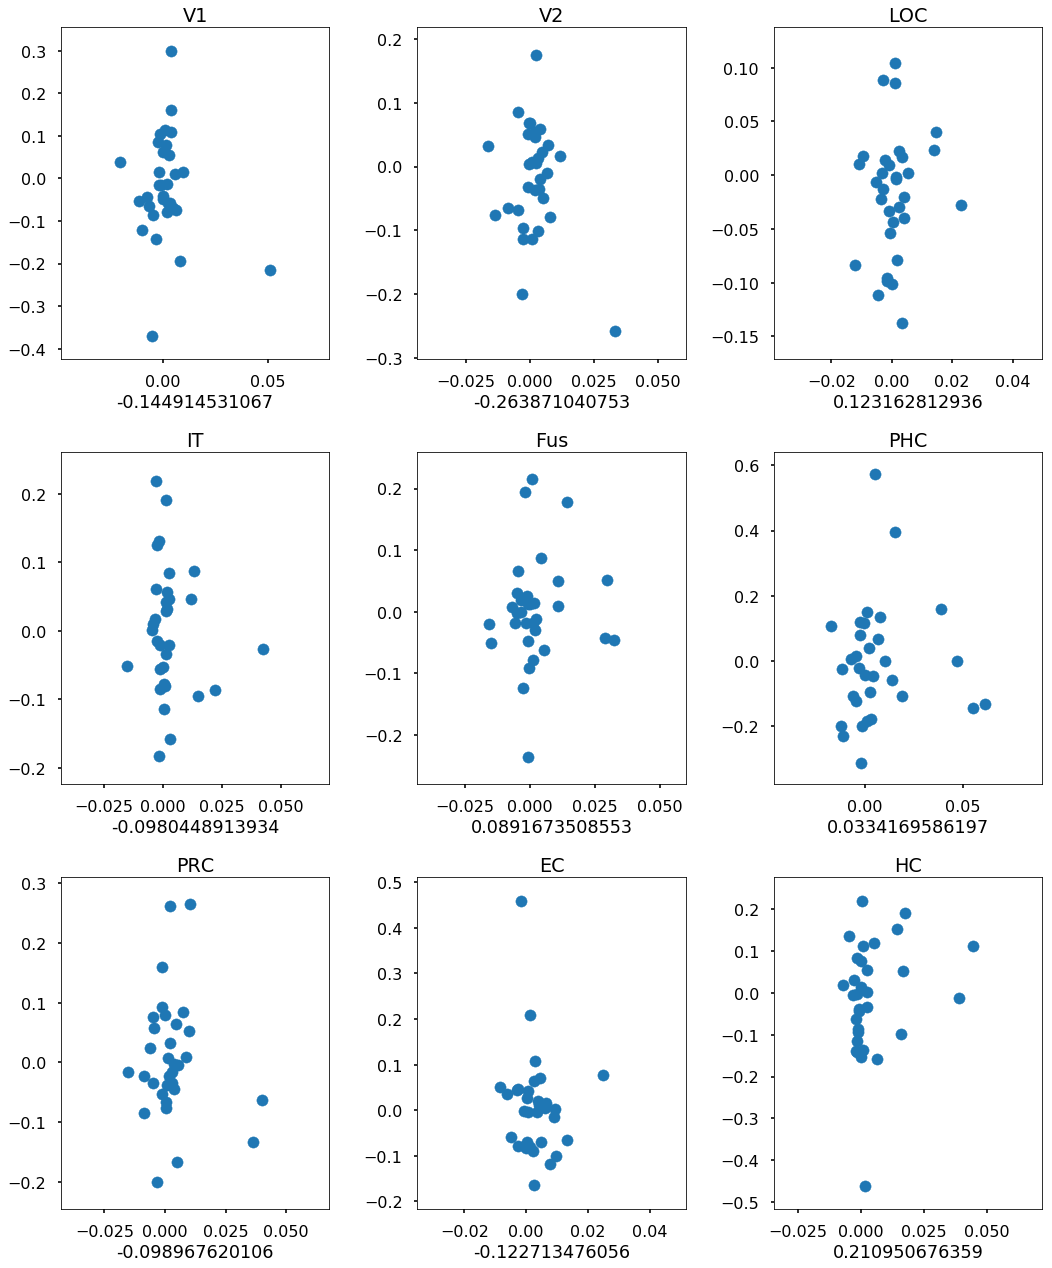

In [48]:
sns.set_context('poster')
rois_x = ['V1','V2','LOC','IT','Fus','PHC','PRC','EC','HC']
rois_y = ['V1','V2','LOC','IT','fusiform','parahippo','PRC','ento','hipp']
x2y = dict(zip(rois_x,rois_y))
fig = plt.figure(figsize=(15,18))
for i,which_roi in enumerate(rois_x):
    plt.subplot(3,3,i+1)
    _X = X[X['roi']==which_roi]
    x = _X.slope.values
    y = Y['{}_diff'.format(x2y[which_roi])]
    plt.scatter(x,y)
    plt.title(which_roi)
    plt.xlabel(stats.pearsonr(x,y)[0])
plt.tight_layout()
    

In [42]:
which_roi

'ento'

In [39]:
len(x)

0

In [40]:
len(y)

32